# Image Similarity, Features and Retrieval

What is a similar images?
https://catriona-campbell.medium.com/doughnut-or-bagel-helping-ai-fill-a-hole-in-perception-f23d29c7838c

## What are image features




### prepare the data, once for WAID and once for the Iguana project
001_hasty_to_tile_data_prep.py

001_isaid_to_tile.py

In [28]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from pathlib import Path

In [30]:
imgage_path_iguana = Path(
    "/Volumes/2TB/DD_MS_COG_ALL_TILES/herdnet_112/val/iguana/Gen_GES01to09_04122021_centered_171913.0404174219_33284.56984052529.jpg")
image_path_empty_1 = Path(
    '/Volumes/2TB/DD_MS_COG_ALL_TILES/herdnet_112/val/empty/Esp_EPCN02_26012021_empty_207607_9847007_207608_9847008.jpg')

image_root_dir = Path(
    "/Volumes/2TB/DD_MS_COG_ALL_TILES/herdnet_112/val")

class_empty = "empty"
class_iguana = "iguana"


iguana_images = [i for i in image_root_dir.joinpath(class_iguana).glob("*.jpg") if not str(i.name).startswith(".")]

empty_images = [i for i in image_root_dir.joinpath(class_empty).glob("*.jpg") if not str(i.name).startswith(".")]

threshold = 500
iguana_images = iguana_images[:threshold]
empty_images = empty_images[:threshold]

#

How to do Reliability Estimation

An Embedding is Worth a Thousand Noisy Labels [ arXiv:2408.14358v1 ]

In [31]:
from pathlib import Path
from active_learning.feature_extraction.timm_feature_extraction import FeatureExtractor


model_name = "timm/resnet34.a1_in1k"
extractor = FeatureExtractor(model_name)

# image_root_dir = "/Users/christian/data/WAID-main/WAID/images/train_sample"  # This should contain subfolders (ClassA, ClassB, ...)
embedding_save_path = "embeddings_with_labels.csv"
tsne_embedding_save_path = "tsne_embeddings_with_labels.csv"

images_list = [i for i in image_root_dir.rglob("*.jpg") if not str(i).startswith(".")]
class_labels = [x.parent.stem for x in images_list]

df_features = extractor.extract_from_image_list(images_list, class_labels=class_labels, save_path=embedding_save_path)


Using device: mps
Loading pretrained model: timm/resnet34.a1_in1k
Model loaded successfully. Input size: (3, 224, 224)


Extracting features: 100%|██████████| 3998/3998 [00:54<00:00, 74.02it/s]


Saved embeddings to embeddings_with_labels.csv


In [32]:
df_features

0         1  \
Gen_GES01to09_04122021_centered_171694.25242745...  0.002604  0.005114   
Gen_GES01to09_04122021_centered_171694.45463892...  0.002434  0.000000   
Gen_GES01to09_04122021_centered_171692.83694720...  0.000000  0.000000   
Gen_GES01to09_04122021_centered_171693.01990043...  0.003006  0.000000   
Gen_GES01to09_04122021_centered_171693.56394556...  0.000676  0.000000   
...                                                      ...       ...   
Scris_SRLS04_10012020_empty_217535_9909515_2175...  0.013106  0.001642   
Scris_SRLS04_10012020_empty_217599_9909551_2176...  0.002353  0.001203   
Scris_SRLS04_10012020_empty_217813_9909484_2178...  0.039006  0.012784   
Scris_SRLS04_10012020_empty_217594_9909543_2175...  0.017124  0.000000   
Scris_SRLS04_10012020_empty_217611_9909545_2176...  0.010061  0.013999   

                                                           2         3  \
Gen_GES01to09_04122021_centered_171694.25242745...  0.006106  0.016614   
Gen_GES01to09_04122021_centered_171694.45463892...  0.054655  0.051833   
Gen_GES01to09_04122021_centered_171692.83694720...  0.058298  0.043544   
Gen_GES01to09_04122021_centered_171693.01990043...  0.015959  0.064876   
Gen_GES01to09_04122021_centered_171693.56394556...  0.019921  0.053950   
...                                                      ...       ...   
Scris_SRLS04_10012020_empty_217535_9909515_2175...  0.073043  0.018700   
Scris_SRLS04_10012020_empty_217599_9909551_2176...  0.000000  0.018853   
Scris_SRLS04_10012020_empty_217813_9909484_2178...  0.001637  0.001255   
Scris_SRLS04_10012020_empty_217594_9909543_2175...  0.028922  0.075707   
Scris_SRLS04_10012020_empty_217611_9909545_2176...  0.063366  0.024612   

                                                           4         5  \
Gen_GES01to09_04122021_centered_171694.25242745...  0.239101  0.000128   
Gen_GES01to09_04122021_centered_171694.45463892...  0.282474  0.000000   
Gen_GES01to09_04122021_centered_171692.83694720...  0.293814  0.011600   
Gen_GES01to09_04122021_centered_171693.01990043...  0.329352  0.000000   
Gen_GES01to09_04122021_centered_171693.56394556...  0.278977  0.000633   
...                                                      ...       ...   
Scris_SRLS04_10012020_empty_217535_9909515_2175...  0.182322  0.001075   
Scris_SRLS04_10012020_empty_217599_9909551_2176...  0.265402  0.000000   
Scris_SRLS04_10012020_empty_217813_9909484_2178...  0.470103  0.001369   
Scris_SRLS04_10012020_empty_217594_9909543_2175...  0.172196  0.007479   
Scris_SRLS04_10012020_empty_217611_9909545_2176...  0.175654  0.012459   

                                                           6         7  \
Gen_GES01to09_04122021_centered_171694.25242745...  0.001042  0.002866   
Gen_GES01to09_04122021_centered_171694.45463892...  0.000000  0.009472   
Gen_GES01to09_04122021_centered_171692.83694720...  0.000000  0.020666   
Gen_GES01to09_04122021_centered_171693.01990043...  0.009095  0.009963   
Gen_GES01to09_04122021_centered_171693.56394556...  0.001195  0.005767   
...                                                      ...       ...   
Scris_SRLS04_10012020_empty_217535_9909515_2175...  0.008589  0.034223   
Scris_SRLS04_10012020_empty_217599_9909551_2176...  0.001376  0.022346   
Scris_SRLS04_10012020_empty_217813_9909484_2178...  0.003199  0.010355   
Scris_SRLS04_10012020_empty_217594_9909543_2175...  0.006419  0.008423   
Scris_SRLS04_10012020_empty_217611_9909545_2176...  0.042067  0.041999   

                                                           8         9  ...  \
Gen_GES01to09_04122021_centered_171694.25242745...  0.057887  0.001946  ...   
Gen_GES01to09_04122021_centered_171694.45463892...  0.060088  0.003637  ...   
Gen_GES01to09_04122021_centered_171692.83694720...  0.039761  0.004140  ...   
Gen_GES01to09_04122021_centered_171693.01990043...  0.066132  0.000000  ...   
Gen_GES01to09_04122021_centered_171693.56394556...  0.066623  0.002512  ...   
...                          

Reduce the hight dimensionality of the features into two dimensions

[1.47509022e-01 9.16169567e-02 6.26639559e-02 4.05525783e-02
 3.95678477e-02 3.46946990e-02 2.92636340e-02 2.86307033e-02
 2.69835318e-02 2.22705151e-02 1.96696590e-02 1.70596248e-02
 1.39421949e-02 1.35839079e-02 1.20628334e-02 1.16237807e-02
 1.08526032e-02 1.04095020e-02 9.62387538e-03 9.16461365e-03
 8.01757988e-03 7.58880637e-03 7.36495891e-03 6.90039825e-03
 6.34283015e-03 6.01627288e-03 5.75794643e-03 5.36710770e-03
 5.32820922e-03 5.04860036e-03 4.84899760e-03 4.63985389e-03
 4.46621244e-03 4.24500082e-03 4.06834458e-03 4.04063390e-03
 3.98865860e-03 3.85085493e-03 3.74895405e-03 3.67210634e-03
 3.59596647e-03 3.48399805e-03 3.41787867e-03 3.20806290e-03
 3.19093388e-03 3.09245582e-03 2.99676005e-03 2.89842055e-03
 2.82075419e-03 2.76252165e-03 2.69408169e-03 2.64842477e-03
 2.56975475e-03 2.49981151e-03 2.43110637e-03 2.34718961e-03
 2.31808946e-03 2.31072901e-03 2.24240248e-03 2.20063171e-03
 2.17178633e-03 2.13769934e-03 2.09922273e-03 2.07255475e-03
 2.05853532e-03 1.978504

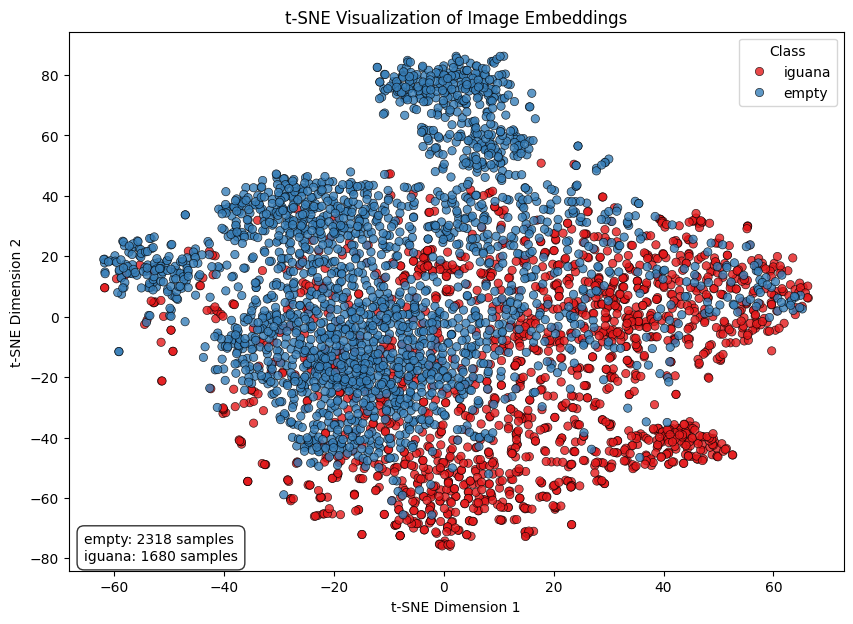

In [33]:
from active_learning.feature_extraction.embedding_clustering import get_tsn_embeddings

df_tsne_embeddings = get_tsn_embeddings(embedding_save_path)

df_tsne_embeddings.to_csv(tsne_embedding_save_path)

In [34]:
df_tsne_embeddings

X          Y   class  \
0     30.442297 -41.559265  iguana   
1     44.772789 -34.726147  iguana   
2     44.352783 -43.795719  iguana   
3     45.091152 -46.284756  iguana   
4     40.494900 -40.134731  iguana   
...         ...        ...     ...   
3993  50.756233  23.827827   empty   
3994  24.263287  43.581707   empty   
3995 -11.707089  72.186249   empty   
3996  49.795284  16.575771   empty   
3997  52.905460  17.839897   empty   

                                              file_name  
0     Gen_GES01to09_04122021_centered_171694.2524274...  
1     Gen_GES01to09_04122021_centered_171694.4546389...  
2     Gen_GES01to09_04122021_centered_171692.8369472...  
3     Gen_GES01to09_04122021_centered_171693.0199004...  
4     Gen_GES01to09_04122021_centered_171693.5639455...  
...                                                 ...  
3993  Scris_SRLS04_10012020_empty_217535_9909515_217...  
3994  Scris_SRLS04_10012020_empty_217599_9909551_217...  
3995  Scris_SRLS04_10012020_empty_217813_9909484_217...  
3996  Scris_SRLS04_10012020_empty_217594_9909543_217...  
3997  Scris_SRLS04_10012020_empty_217611_9909545_217...  

[3998 rows x 4 columns]

In [35]:
from active_learning.feature_extraction.embedding_clustering import visualize_clusters, perform_clustering

perform_clustering(df_tsne_embeddings, n_clusters=2)

df_tsne_embeddings

Applying K-means clustering with 2 clusters...


X          Y   class  \
0     30.442297 -41.559265  iguana   
1     44.772789 -34.726147  iguana   
2     44.352783 -43.795719  iguana   
3     45.091152 -46.284756  iguana   
4     40.494900 -40.134731  iguana   
...         ...        ...     ...   
3993  50.756233  23.827827   empty   
3994  24.263287  43.581707   empty   
3995 -11.707089  72.186249   empty   
3996  49.795284  16.575771   empty   
3997  52.905460  17.839897   empty   

                                              file_name  cluster  \
0     Gen_GES01to09_04122021_centered_171694.2524274...        1   
1     Gen_GES01to09_04122021_centered_171694.4546389...        1   
2     Gen_GES01to09_04122021_centered_171692.8369472...        1   
3     Gen_GES01to09_04122021_centered_171693.0199004...        1   
4     Gen_GES01to09_04122021_centered_171693.5639455...        1   
...                                                 ...      ...   
3993  Scris_SRLS04_10012020_empty_217535_9909515_217...        0   
3994  Scris_SRLS04_10012020_empty_217599_9909551_217...        0   
3995  Scris_SRLS04_10012020_empty_217813_9909484_217...        0   
3996  Scris_SRLS04_10012020_empty_217594_9909543_217...        1   
3997  Scris_SRLS04_10012020_empty_217611_9909545_217...        1   

     predicted_class  is_correct  cluster_confidence  
0             iguana        True            0.590472  
1             iguana        True            0.590472  
2             iguana        True            0.590472  
3             iguana        True            0.590472  
4             iguana        True            0.590472  
...              ...         ...                 ...  
3993           empty        True            0.807602  
3994           empty        True            0.807602  
3995           empty        True            0.807602  
3996          iguana       False            0.590472  
3997          iguana       False            0.590472  

[3998 rows x 8 columns]

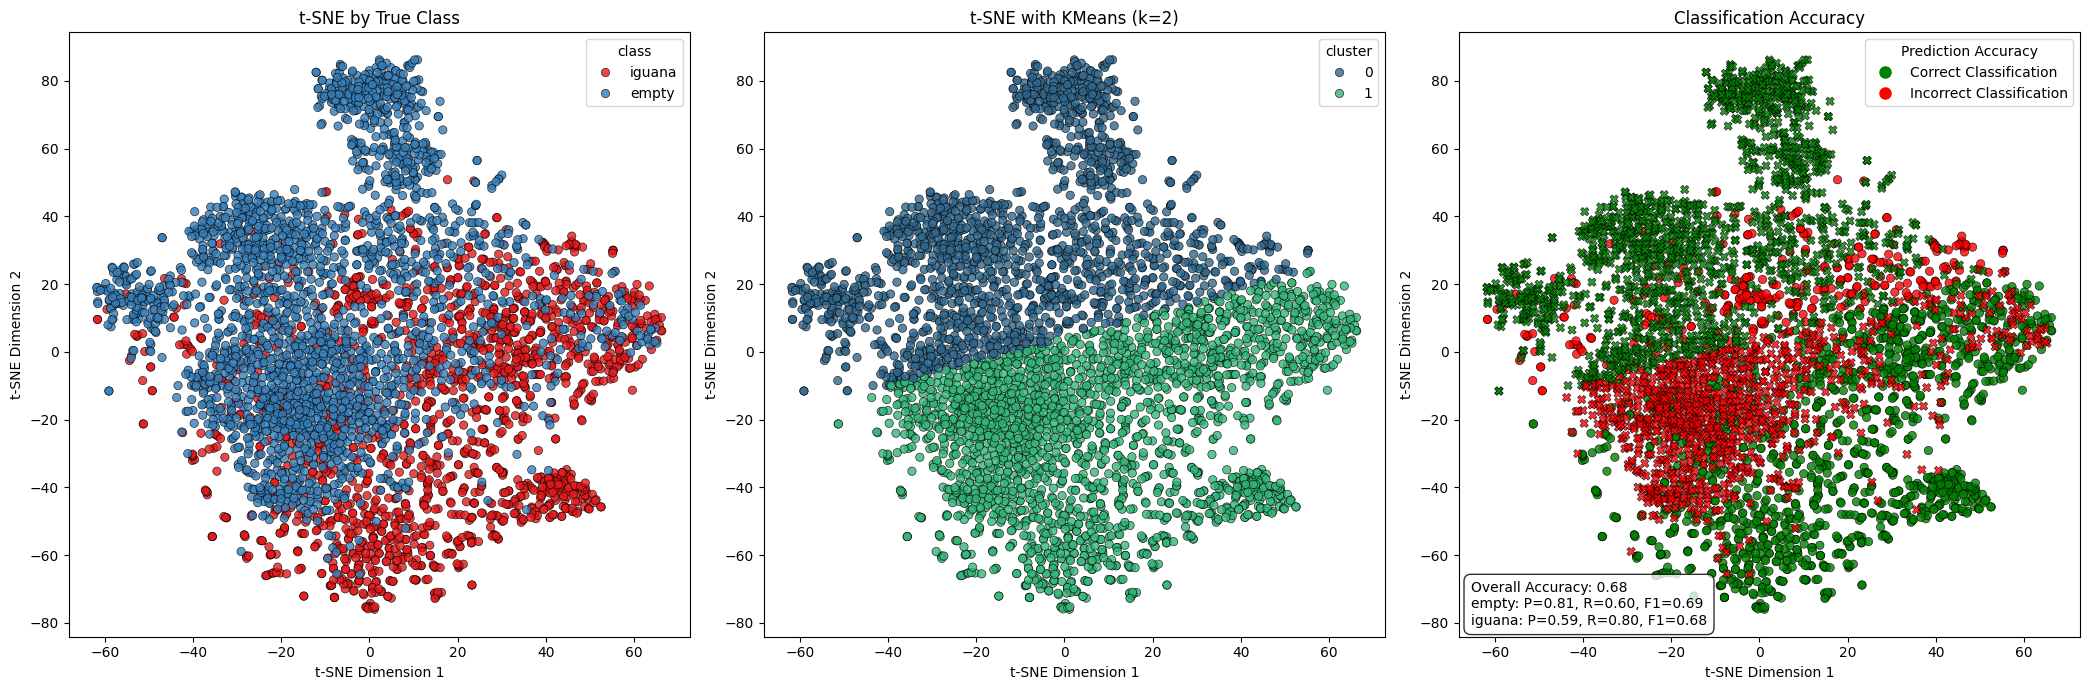

In [36]:

visualize_clusters(df_tsne_embeddings)

In [37]:
from active_learning.feature_extraction.embedding_clustering import get_misclassified_items

### What is the error now?
df_misclassified = get_misclassified_items(df_tsne_embeddings)

df_misclassified

true_class predicted_class  cluster  cluster_confidence          X  \
2314      empty          iguana        1            0.590472 -14.216584   
2848      empty          iguana        1            0.590472  -9.180337   
2842      empty          iguana        1            0.590472  -4.509742   
2839      empty          iguana        1            0.590472 -17.890144   
2838      empty          iguana        1            0.590472 -11.886982   
...         ...             ...      ...                 ...        ...   
1278     iguana           empty        0            0.807602   2.070312   
1279     iguana           empty        0            0.807602   0.503091   
1280     iguana           empty        0            0.807602   0.565486   
1282     iguana           empty        0            0.807602  -0.911220   
187      iguana           empty        0            0.807602 -22.021227   

              Y                                          file_name  
2314 -27.554399  Gen_GES01to09_04122021_empty_171675_33240_1716...  
2848 -23.658243  Gen_GES01to09_04122021_empty_171603_33214_1716...  
2842  -5.126073  Gen_GES01to09_04122021_empty_171270_33301_1712...  
2839  -3.957609  Gen_GES01to09_04122021_empty_171742_33261_1717...  
2838 -42.198814  Gen_GES01to09_04122021_empty_171476_33230_1714...  
...         ...                                                ...  
1278  15.890166  Gen_GES01to09_04122021_centered_171239.6714262...  
1279  13.274284  Gen_GES01to09_04122021_centered_171239.4692148...  
1280  14.673119  Gen_GES01to09_04122021_centered_171239.4451420...  
1282  17.215427  Gen_GES01to09_04122021_centered_171239.9843725...  
187    9.686131  Gen_GES01to09_04122021_centered_171634.9226208...  

[1266 rows x 7 columns]

## Display those incorrect images


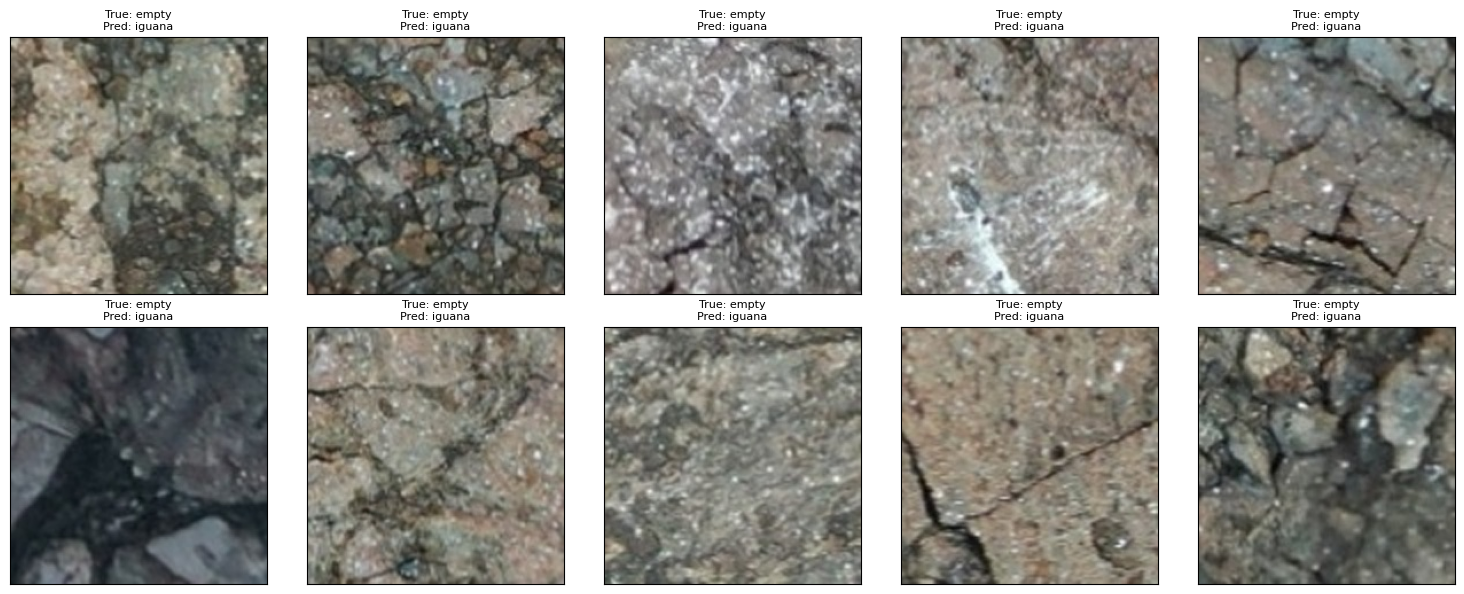

In [38]:

from active_learning.feature_extraction.embedding_clustering import display_misclassified_grid

display_misclassified_grid(df_misclassified[df_misclassified.true_class == "empty"], image_dir=image_root_dir, cols=5, rows=2, figsize=(15, 6))

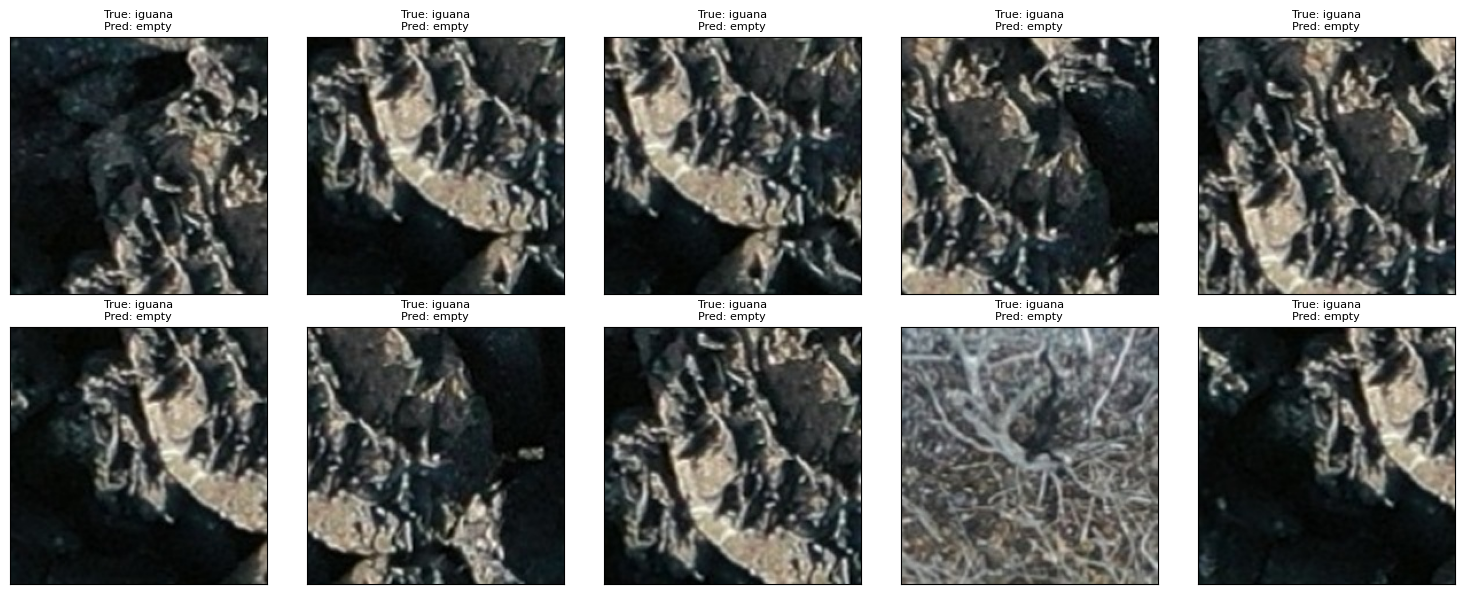

In [39]:
display_misclassified_grid(df_misclassified[df_misclassified.true_class == "iguana"], image_dir=image_root_dir, cols=5, rows=2, figsize=(15, 6))


Diagnosis:
- There are label errors in the data whith images labeled as empty, but they contain animals
- a pretrained resnet model can't seperate occupied from empty images

### Load a fine tuned weight which was fine tuned Orthomosaic data

Using device: mps
Loading checkpoint from: /Users/christian/PycharmProjects/hnee/pytorch-image-models/output/iguanas_empty_resnet34.a1_in1k/model_best.pth.tar


/Users/christian/PycharmProjects/hnee/active_learning/active_learning/feature_extraction/timm_feature_extraction.py:61: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpo

Detected checkpoint dictionary with state_dict
Model loaded successfully. Input size: (3, 224, 224)


Extracting features: 100%|██████████| 3998/3998 [00:53<00:00, 74.76it/s]


Saved embeddings to embeddings_with_labels_ft.csv
[6.44053282e-01 1.31579644e-01 7.60679390e-02 1.98283492e-02
 1.40462864e-02 1.07381905e-02 8.39386462e-03 7.34610765e-03
 5.50506055e-03 4.40095701e-03 4.29877325e-03 3.61706694e-03
 2.91508955e-03 2.63459031e-03 2.56252134e-03 2.42110482e-03
 2.03997885e-03 1.89355540e-03 1.78159123e-03 1.50365966e-03
 1.40744450e-03 1.37286474e-03 1.25136918e-03 1.21286308e-03
 1.13667497e-03 1.11615831e-03 1.02212764e-03 9.88210449e-04
 8.75513140e-04 8.68810699e-04 8.43982826e-04 7.96971496e-04
 7.72085838e-04 7.68832641e-04 7.13327945e-04 6.96885216e-04
 6.35441307e-04 6.22591855e-04 5.93407894e-04 5.76391266e-04
 5.51036630e-04 5.42764666e-04 5.27145100e-04 5.11834156e-04
 4.92891784e-04 4.87185037e-04 4.60567673e-04 4.53063407e-04
 4.43249839e-04 4.20276673e-04 4.14713970e-04 4.11555005e-04
 4.07999777e-04 3.95380334e-04 3.83485198e-04 3.75586739e-04
 3.62264689e-04 3.55882915e-04 3.51701606e-04 3.39030121e-04
 3.33056319e-04 3.28119288e-04 3.20

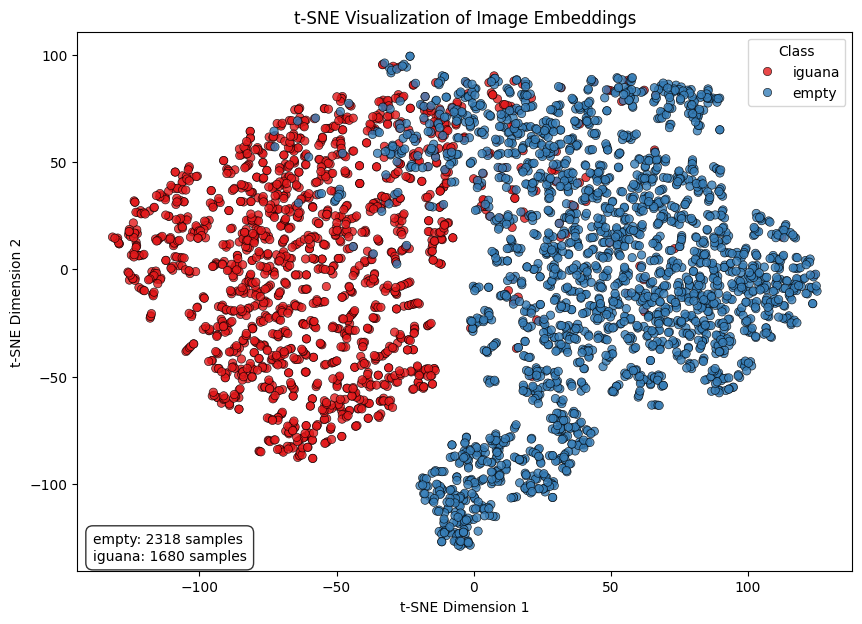

In [40]:
from pathlib import Path
from active_learning.feature_extraction.timm_feature_extraction import FeatureExtractor


model_name = "timm/resnet34.a1_in1k"
model_path = "/Users/christian/PycharmProjects/hnee/pytorch-image-models/output/iguanas_empty_resnet34.a1_in1k/model_best.pth.tar"
extractor = FeatureExtractor(model_name=model_name, model_path=model_path)

# image_root_dir = "/Users/christian/data/WAID-main/WAID/images/train_sample"  # This should contain subfolders (ClassA, ClassB, ...)
embedding_ft_save_path = "embeddings_with_labels_ft.csv"
tsne_embedding_ft_save_path = "tsne_embeddings_with_labels.csv"

images_list = [i for i in image_root_dir.rglob("*.jpg") if not str(i).startswith(".")]
class_labels = [x.parent.stem for x in images_list]

df_features_ft = extractor.extract_from_image_list(images_list, class_labels=class_labels, save_path=embedding_ft_save_path)

df_tsne_embeddings_ft_iguanas_points = get_tsn_embeddings(embedding_ft_save_path, perplexity=5)


Applying K-means clustering with 2 clusters...


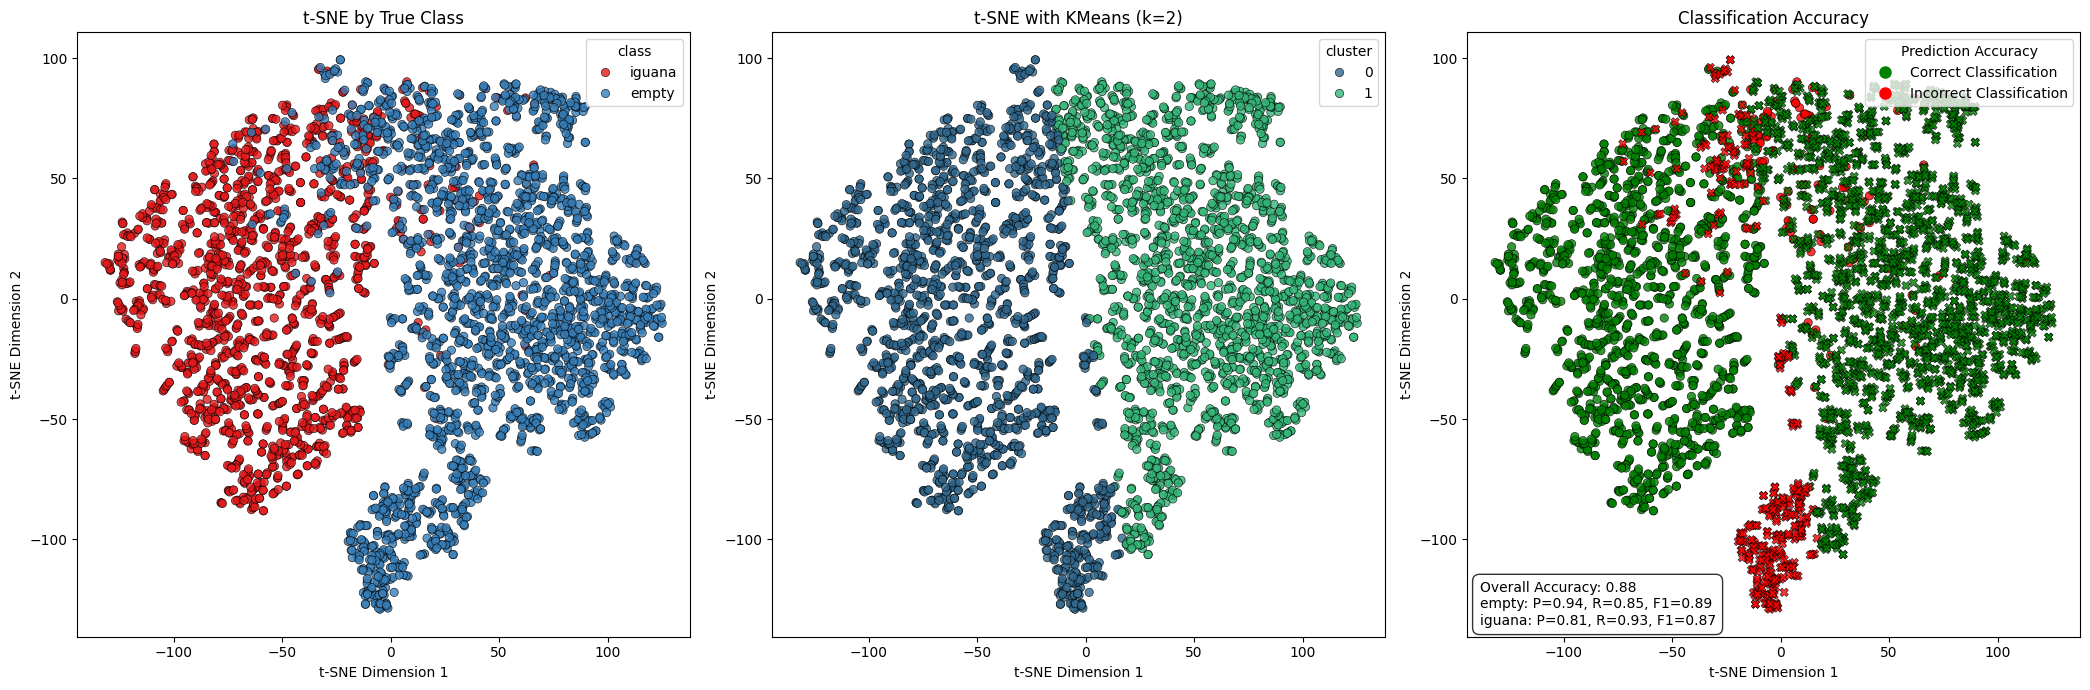

In [41]:
perform_clustering(df_tsne_embeddings_ft_iguanas_points, n_clusters=2)
visualize_clusters(df_tsne_embeddings_ft_iguanas_points)

In [42]:
### What is the error now?
df_misclassified = get_misclassified_items(df_tsne_embeddings_ft_iguanas_points)

df_misclassified

true_class predicted_class  cluster  cluster_confidence          X  \
2608      empty          iguana        0            0.813118 -23.233078   
3221      empty          iguana        0            0.813118   3.716532   
3217      empty          iguana        0            0.813118 -15.975748   
3216      empty          iguana        0            0.813118  -6.593168   
3209      empty          iguana        0            0.813118   5.770688   
...         ...             ...      ...                 ...        ...   
1327     iguana           empty        1            0.943187  -2.735159   
1334     iguana           empty        1            0.943187  -7.935668   
1335     iguana           empty        1            0.943187  31.224274   
1128     iguana           empty        1            0.943187  -6.021995   
183      iguana           empty        1            0.943187   9.623185   

               Y                                          file_name  
2608   47.395943  Gen_GES01to09_04122021_empty_172095_33387_1720...  
3221 -112.037483  Gen_GES01to09_04122021_empty_172183_33412_1721...  
3217   29.308807  Gen_GES01to09_04122021_empty_172168_33365_1721...  
3216 -106.858856  Gen_GES01to09_04122021_empty_172050_33247_1720...  
3209 -114.666656  Gen_GES01to09_04122021_empty_172109_33245_1721...  
...          ...                                                ...  
1327   87.026192  Gen_GES01to09_04122021_centered_172168.5490464...  
1334   75.463234  Gen_GES01to09_04122021_centered_171998.0895964...  
1335   21.463205  Gen_GES01to09_04122021_centered_172192.2029731...  
1128   76.923599  Gen_GES01to09_04122021_centered_172059.1333859...  
183    23.721123  Gen_GES01to09_04122021_centered_171634.8504025...  

[477 rows x 7 columns]

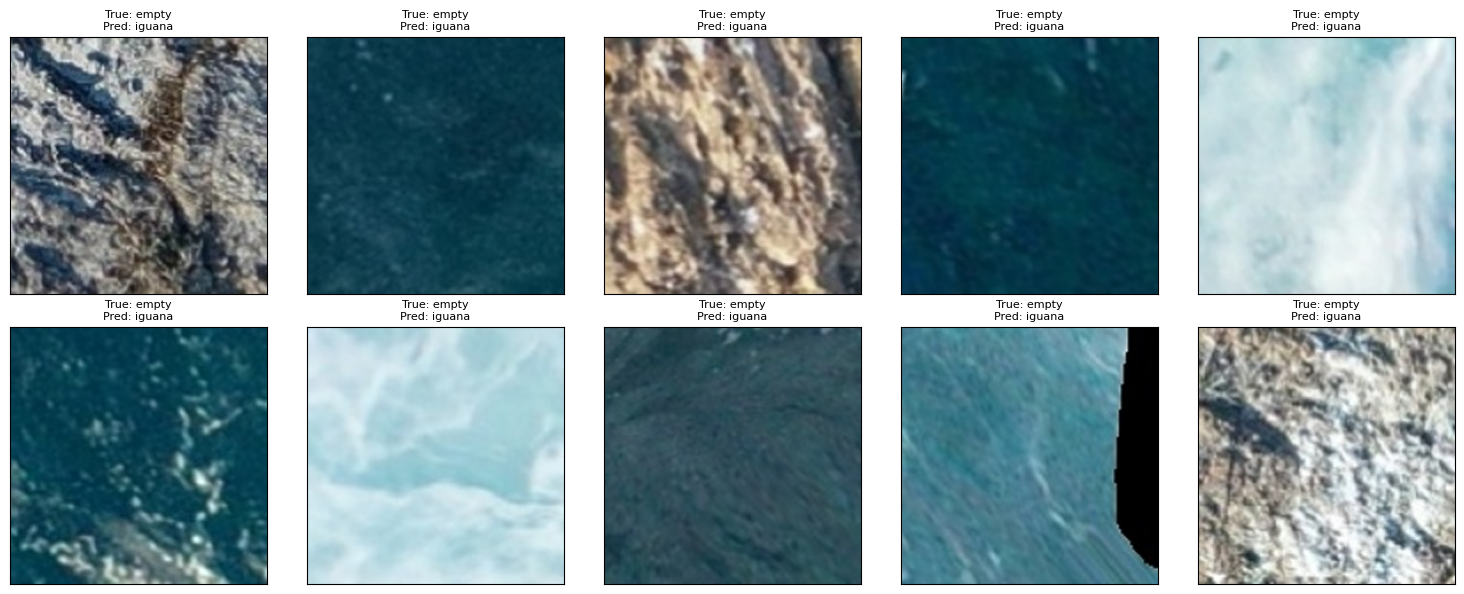

In [43]:
from active_learning.feature_extraction.embedding_clustering import display_misclassified_grid

display_misclassified_grid(df_misclassified[df_misclassified.true_class == "empty"], image_dir=image_root_dir, cols=5, rows=2, figsize=(15, 6))

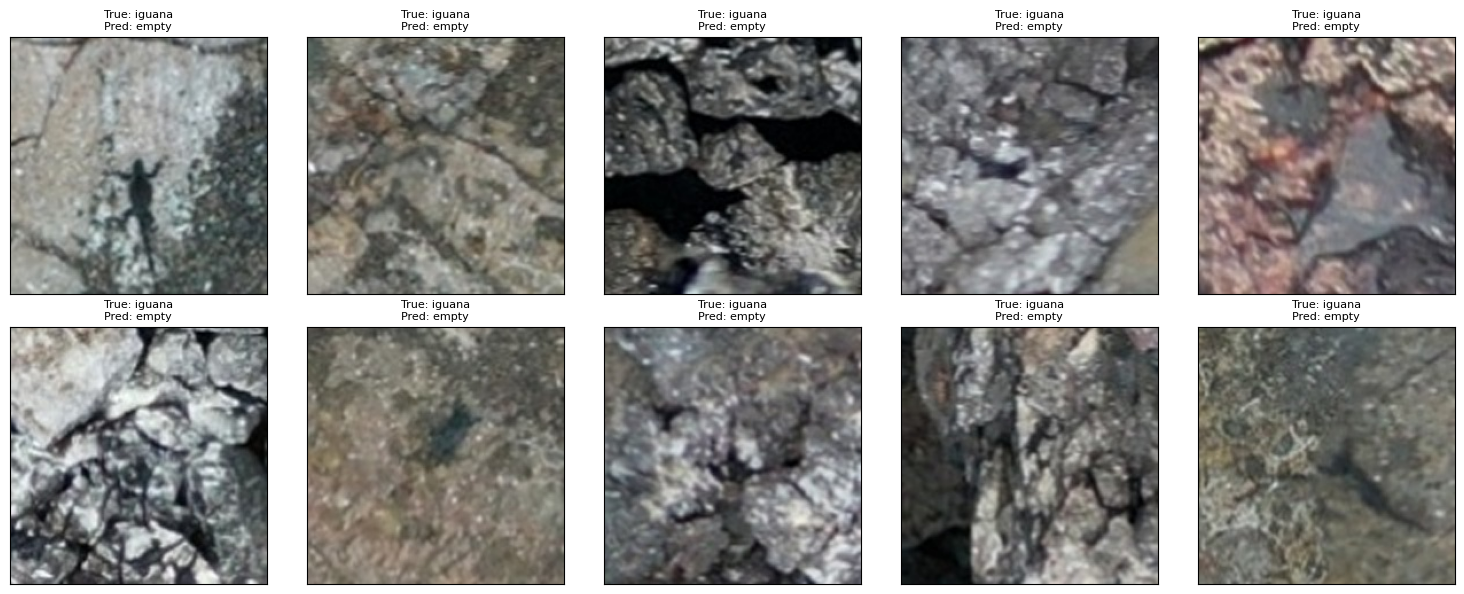

In [44]:
from active_learning.feature_extraction.embedding_clustering import display_misclassified_grid

display_misclassified_grid(df_misclassified[df_misclassified.true_class == "iguana"], image_dir=image_root_dir, cols=5, rows=2, figsize=(15, 6))

In [ ]:
from active_learning.feature_extraction.timm_logit_extraction import LogitExtractor

### Look at the embeddings of the Dense Classification

# Initialize with a custom checkpoint
extractor2 = LogitExtractor(
    model_name='resnet34',  # Base architecture
    checkpoint_path=model_path,  # Your trained weights
    num_classes=2,  # Number of classes in your model
)

# Use it the same way for inference

# Get top probabilities and class indices
logits = extractor2.extract_logits(img)
top_probs, top_indices = extractor2.extract_probabilities(img, top_k=2)
print("\nTop 5 predictions:")
for prob, idx in zip(top_probs[0], top_indices[0]):
    print(f"Class {idx.item()}: {prob.item():.2f}%")